# Exploratory Data Analysis

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Gemstone Price Prediction dataset. You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the basis of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have a better profit share. Also, provide them with the best 5 attributes that are most important.

## Import Libraries

In [112]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import FactorAnalysis
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Import Dataset

In [2]:
train = pd.read_csv("../data/clean_data/train.csv")

In [3]:
train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


## Univariate Analysis
Performing univariate analysis to understand how each variable is distributed within the train data sample.

### price
This is the target variable, it is numerical continuous type data

Summary statistics:

In [4]:
train.price.describe()

count    193573.000000
mean       3969.155414
std        4034.374138
min         326.000000
25%         951.000000
50%        2401.000000
75%        5408.000000
max       18818.000000
Name: price, dtype: float64

In [5]:
print("mode:", train.price.mode())

mode: 0    544
Name: price, dtype: int64


In [6]:
print("Range:", max(train.price)-min(train.price))
q75, q25 = np.percentile(train['price'], [75 ,25])
print("IQR:", q75-q25)

Range: 18492
IQR: 4457.0


Scatter plot:

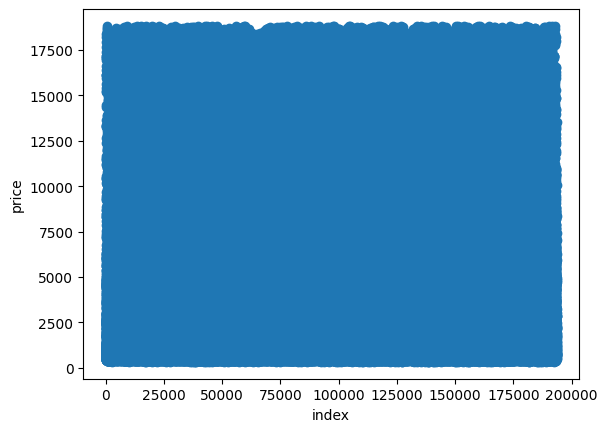

In [7]:
plt.scatter(train.index, train.price)
plt.xlabel("index")
plt.ylabel("price")
plt.show()

Boxplot:

{'whiskers': [<matplotlib.lines.Line2D at 0x253e234a590>,
 'caps': [<matplotlib.lines.Line2D at 0x253e23d8490>,
 'boxes': [<matplotlib.lines.Line2D at 0x253beb84090>],
 'medians': [<matplotlib.lines.Line2D at 0x253bebbd510>],
 'fliers': [<matplotlib.lines.Line2D at 0x253e23d30d0>],
 'means': []}

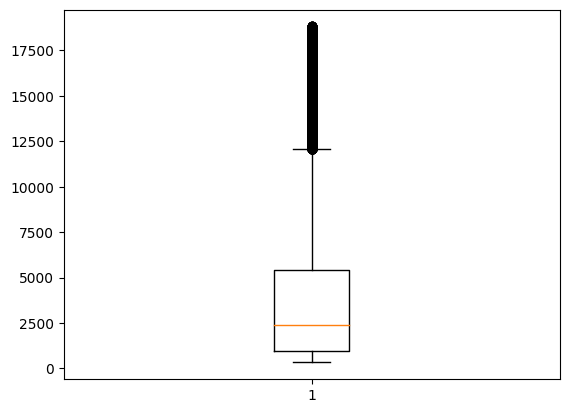

In [8]:
plt.boxplot(train.price)

Density plot:

(-1000.0, 29913.2)

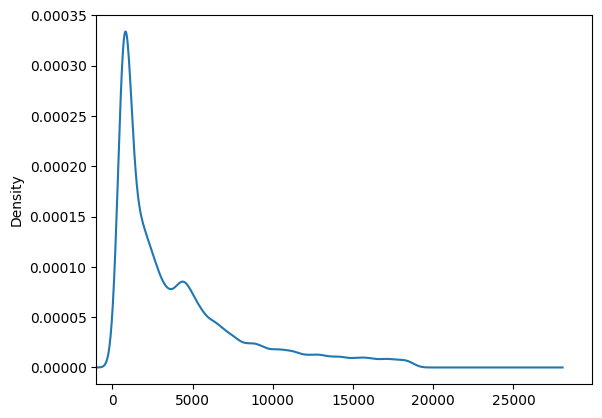

In [9]:
train.price.plot(kind='density')
plt.xlim(-1000)

Outlier inspection:

In [10]:
train[train.price>18000]

,carat,cut,color,clarity,depth,table,x,y,z,price
260,2.20,Very Good,H,SI1,60.2,61.0,8.49,8.45,5.08,18363
343,2.01,Premium,I,VS1,60.8,60.0,8.15,8.24,4.97,18181
442,2.01,Ideal,H,SI1,62.2,56.0,8.05,8.07,5.01,18493
543,2.04,Premium,G,SI1,59.8,58.0,8.32,8.26,4.97,18680
554,2.04,Good,I,IF,63.8,61.0,7.93,8.00,5.14,18659
...,...,...,...,...,...,...,...,...,...,...
192640,2.03,Ideal,H,SI1,60.9,55.0,8.17,8.24,4.99,18186
192836,2.01,Premium,H,SI1,59.7,56.0,8.25,8.20,4.90,18398
192873,2.01,Ideal,G,SI2,62.7,57.0,8.09,8.13,5.08,18804
193025,2.10,Very Good,E,SI1,62.0,60.0,8.16,8.22,5.08,18630


It seems that price column has a lot of extreme values but there are not isolated case for it to be removed or manipulated. Hence it is better to leave it as it is. The data is skewed to the right and it is advisable to scale it to a normal distribution.

### carat
This is an independent variable, it is numerical continuous data type

Summary statistics:

In [11]:
train.carat.describe()

count    193573.000000
mean          0.790688
std           0.462688
min           0.200000
25%           0.400000
50%           0.700000
75%           1.030000
max           3.500000
Name: carat, dtype: float64

In [12]:
print("mode:", train.carat.mode())

mode: 0    0.3
Name: carat, dtype: float64


In [13]:
print("Range:", max(train.carat)-min(train.carat))
q75, q25 = np.percentile(train['carat'], [75 ,25])
print("IQR:", q75-q25)

Range: 3.3
IQR: 0.63


Scatter plot:

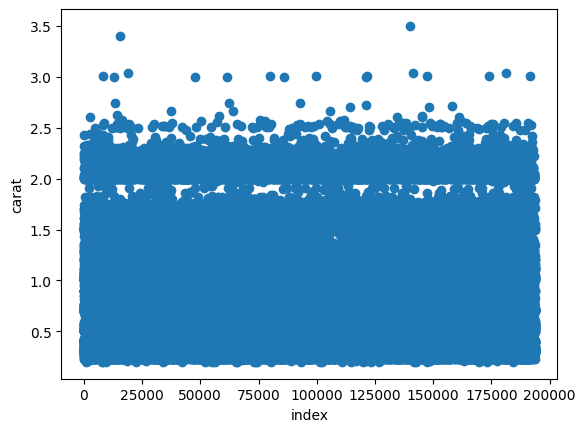

In [14]:
plt.scatter(train.index, train.carat)
plt.xlabel("index")
plt.ylabel("carat")
plt.show()

Boxplot:

Text(0.5, 0, 'carat')

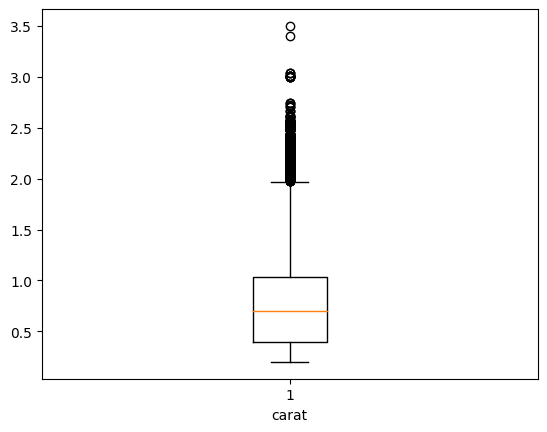

In [15]:
plt.boxplot(train.carat)
plt.xlabel("carat")

Density plot:

(0.0, 5.48)

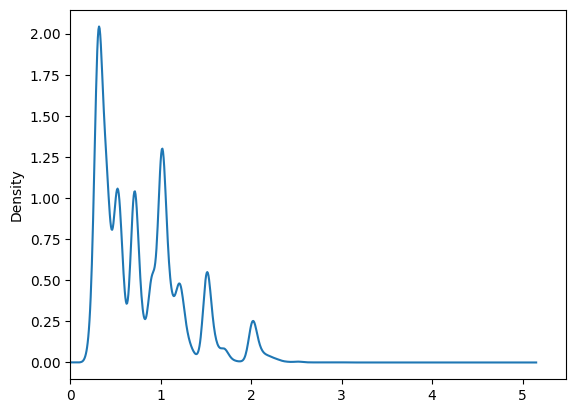

In [16]:
train.carat.plot(kind='density')
plt.xlim(0)

Outlier inspection:

In [17]:
train[train.carat>2.6]

,carat,cut,color,clarity,depth,table,x,y,z,price
2821,2.61,Very Good,H,SI2,63.1,56.0,8.75,8.65,5.46,12271
8089,3.01,Premium,I,SI2,60.5,60.0,9.43,9.34,5.62,14038
13079,3.00,Ideal,I,SI2,62.1,55.0,9.42,9.24,5.69,17712
13517,2.74,Very Good,E,SI2,63.3,60.0,8.88,8.84,5.61,17024
14132,2.63,Premium,J,SI2,61.3,60.0,8.83,8.79,5.37,14766
15555,3.40,Fair,F,SI2,65.9,59.0,8.49,8.43,5.59,18242
18817,3.04,Very Good,J,SI2,63.1,56.0,9.36,9.31,5.75,15354
37370,2.66,Good,J,VS2,64.6,61.0,8.66,8.56,5.56,18559
47783,3.00,Premium,I,I1,61.7,56.0,9.42,10.01,5.67,11370
58172,2.62,Premium,I,SI2,61.7,62.0,8.75,8.69,5.49,15993


It seems that carat column has some extreme values and are isolated. So we can remove them as there are not a lot of them. The column does not follow any specific distribution hence it is important scale.

### cut
This is an indpendent variable, it categorical ordinal data type

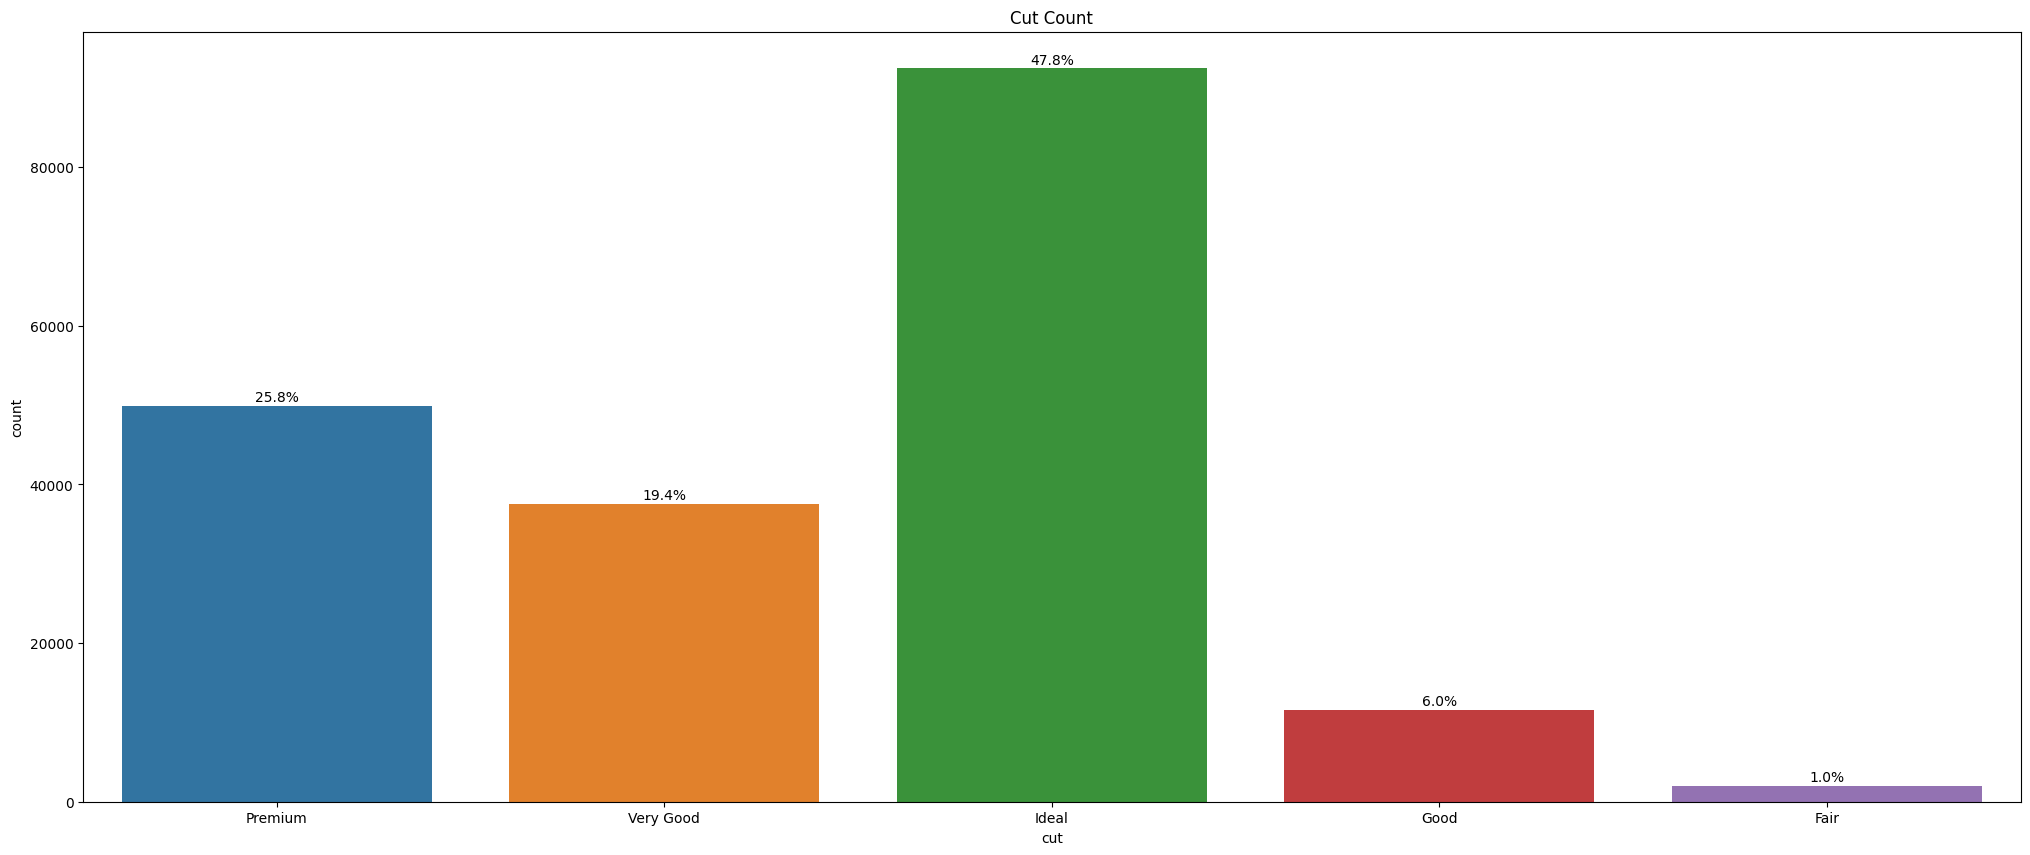

In [18]:
fig, ax = plt.subplots(figsize = (25,10))
sns.countplot(x= train.cut)
plt.title("Cut Count")

total = len(train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

The data is unbalanced in this column, 'ideal' accounts for 47.8% of the data whereas 'Fair' is only 1.0%. Therefore this imbalance has to solved by undersampling or oversampling. Since the data is ordinal we should also perform ordinal encoding on cut column.

### color
This is an independent variable, it is categorical nominal data type

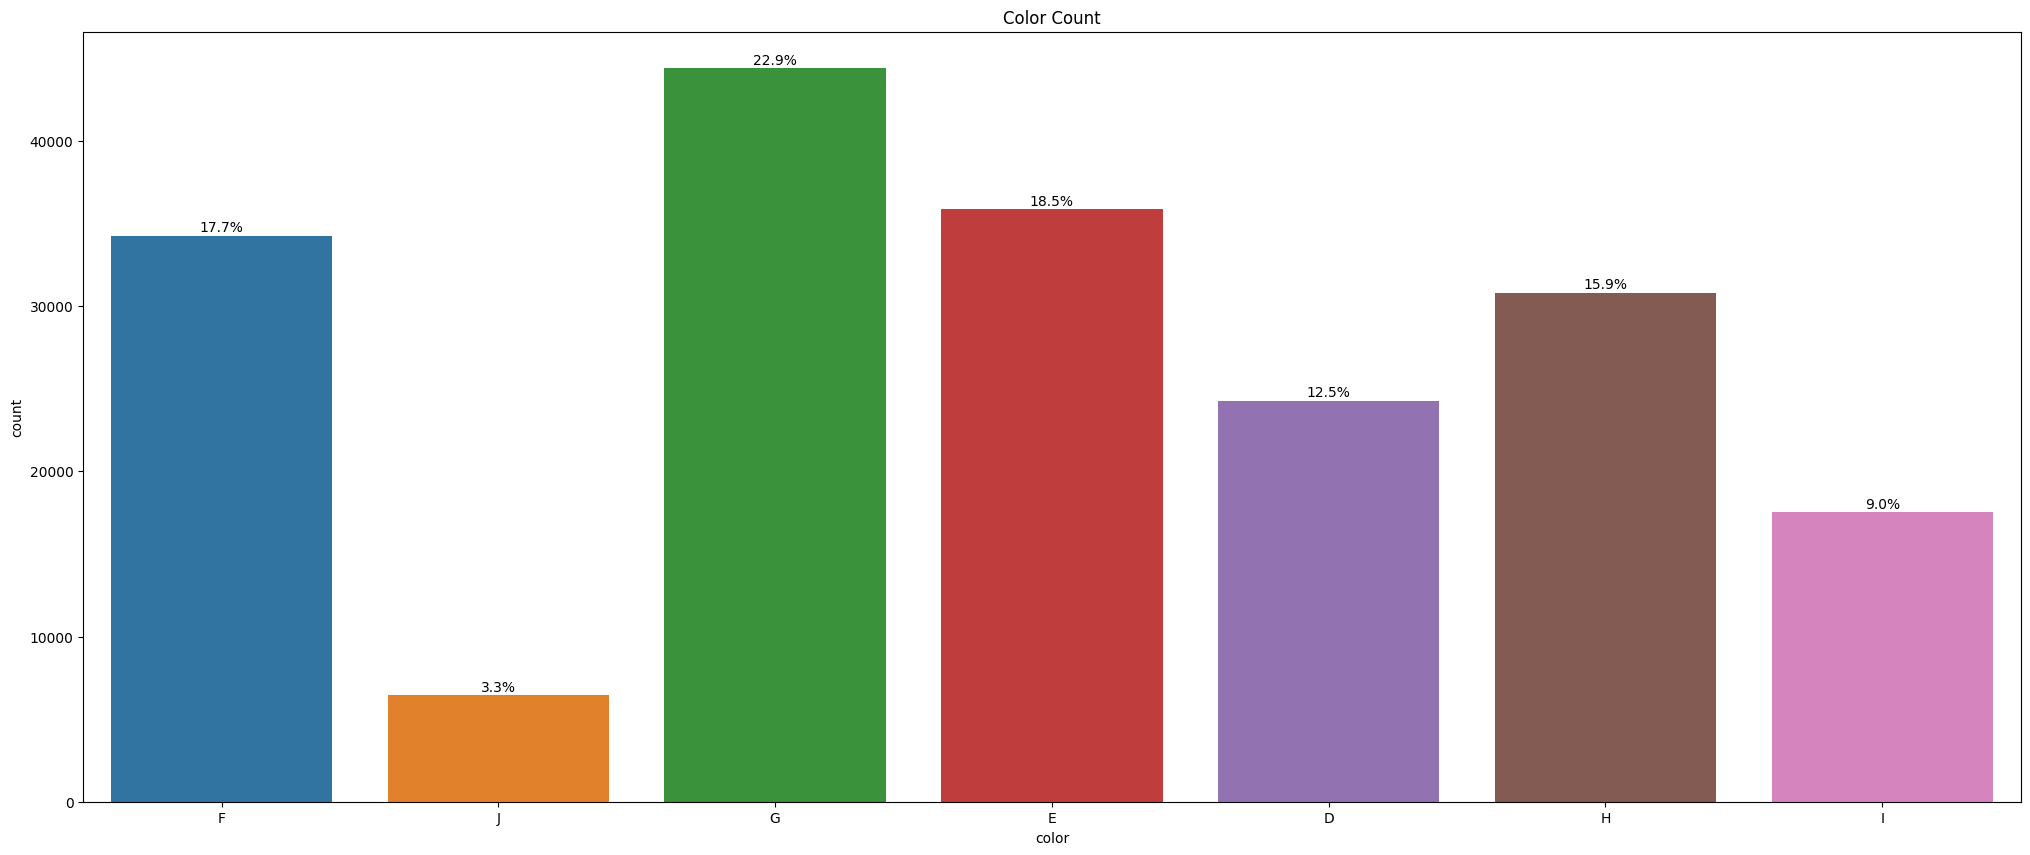

In [19]:
fig, ax = plt.subplots(figsize = (25,10))
sns.countplot(x= train.color)
plt.title("Color Count")

total = len(train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

Most of the categories are evenly distributed except for color 'J' which accounts for only 3.3%. It is advisable to perform oversampling color 'J'. This is a categorical nominal data type therefore it should be one-hot encoded.

### clarity
This is an independent variable, it is categorical ordinal data type

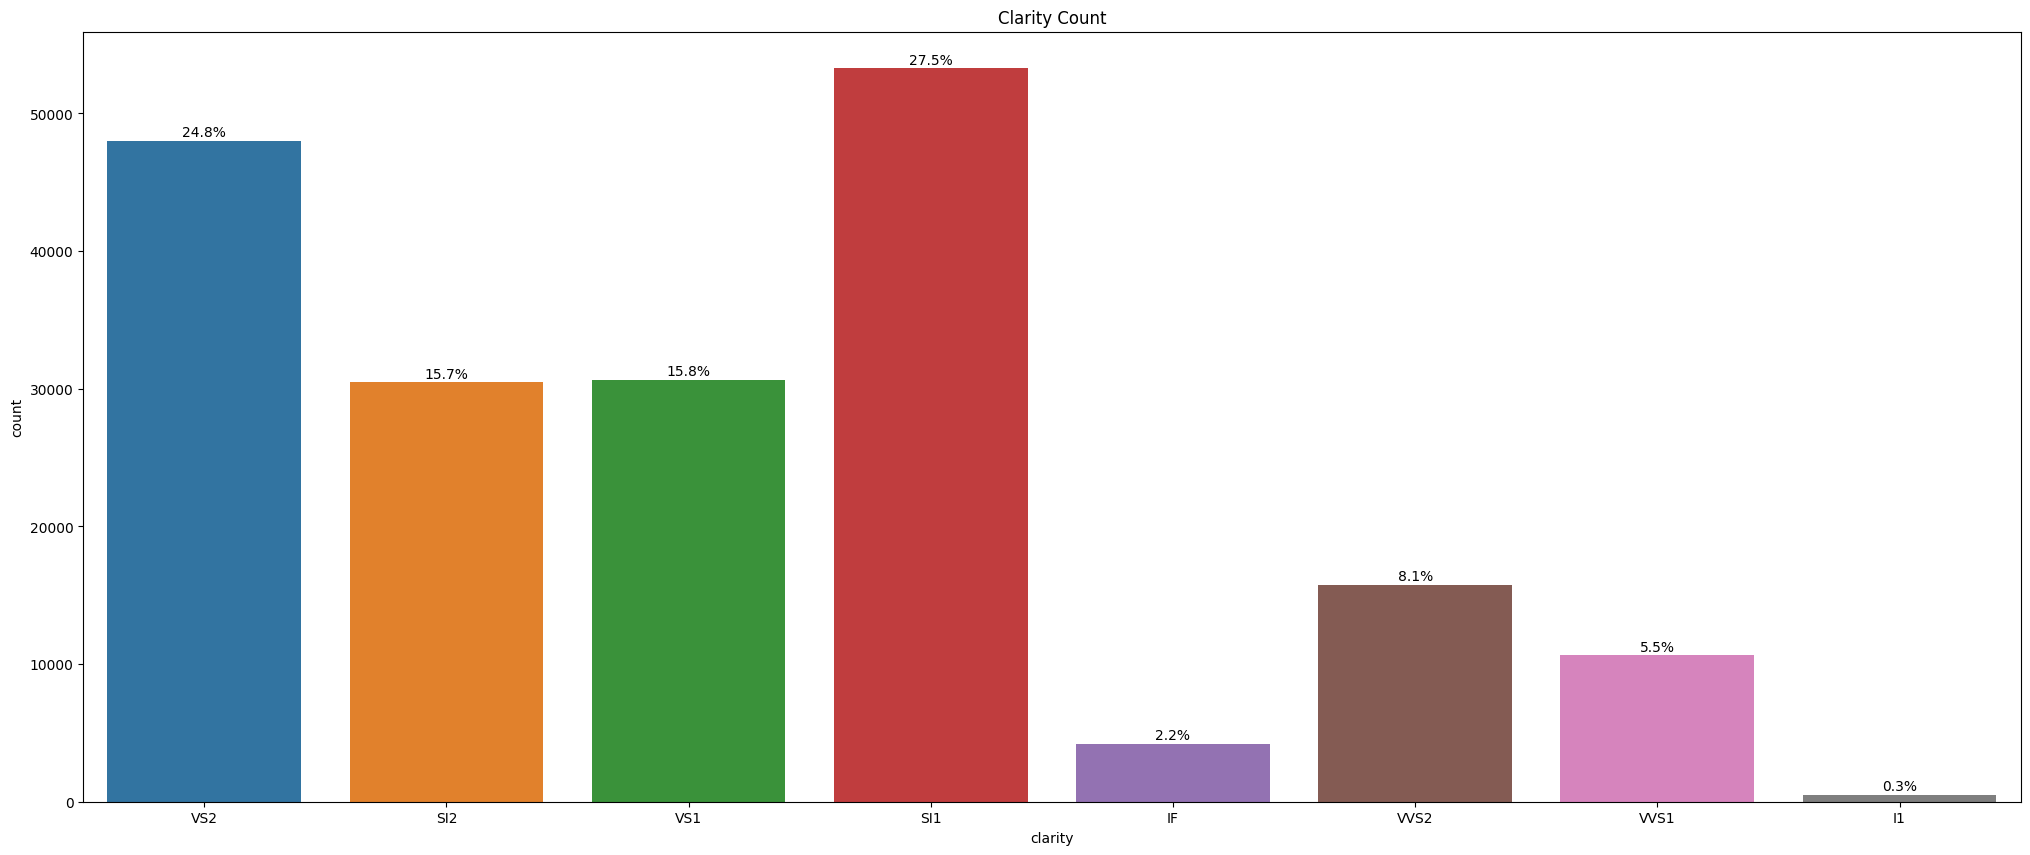

In [20]:
fig, ax = plt.subplots(figsize = (25,10))
sns.countplot(x= train.clarity)
plt.title("Clarity Count")

total = len(train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

The data is unbalanced in this column, values 'IF', 'WS2', 'WS1', and 'I1' account for 2.2%, 8.1%, 5.5%, and 0.3% respectively. Therefore this imbalance has to solved by oversampling. Since the data is ordinal we should also perform ordinal encoding on clarity column.

### depth
This is an independent variable, it is numerical continuous data type

Summary statistics:

In [21]:
train.depth.describe()

count    193573.000000
mean         61.820574
std           1.081704
min          52.100000
25%          61.300000
50%          61.900000
75%          62.400000
max          71.600000
Name: depth, dtype: float64

In [22]:
print("mode:", train.depth.mode())

mode: 0    61.9
Name: depth, dtype: float64


In [23]:
print("Range:", max(train.depth)-min(train.depth))
q75, q25 = np.percentile(train['depth'], [75 ,25])
print("IQR:", q75-q25)

Range: 19.499999999999993
IQR: 1.1000000000000014


Scatter plot:

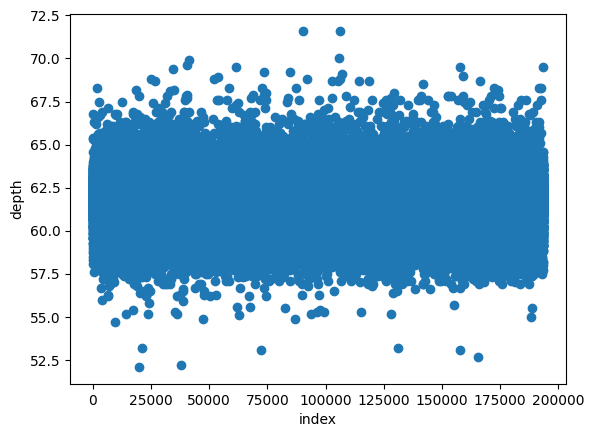

In [24]:
plt.scatter(train.index, train.depth)
plt.xlabel("index")
plt.ylabel("depth")
plt.show()

Box plot:

Text(0.5, 0, 'depth')

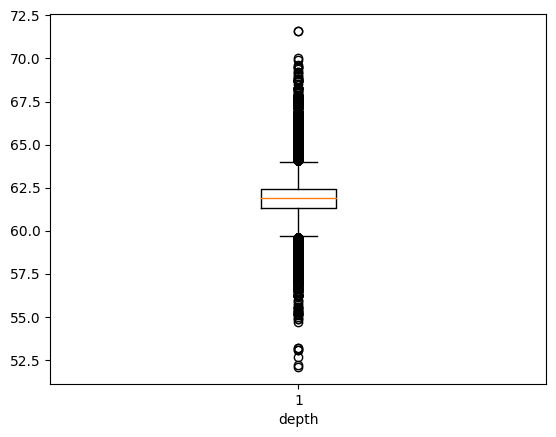

In [25]:
plt.boxplot(train.depth)
plt.xlabel("depth")

Density plot:

(52.0, 71.0)

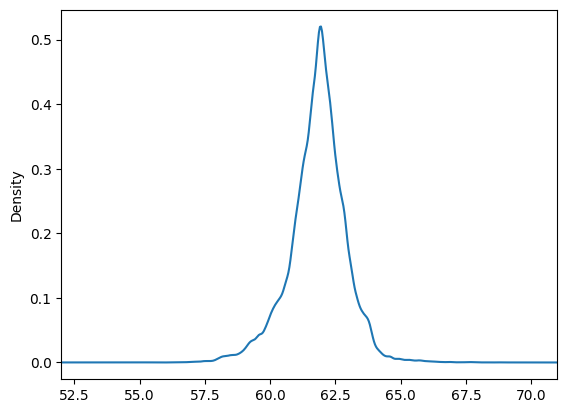

In [26]:
train.depth.plot(kind='density')
plt.xlim(52, 71)

Outlier inspection:

In [27]:
train[((train.depth>70) | (train.depth<55))]

,carat,cut,color,clarity,depth,table,x,y,z,price
9781,0.78,Fair,F,VS2,54.7,67.0,6.25,6.15,3.34,2762
20056,0.98,Fair,G,SI2,52.1,67.0,6.22,6.26,3.39,2364
21315,0.71,Fair,E,SI1,53.2,66.0,5.98,5.92,3.40,2724
38125,1.09,Fair,G,SI1,52.2,62.0,6.80,6.64,3.94,4427
47241,2.02,Fair,H,VS2,54.9,69.0,8.42,8.31,4.84,17975
72104,1.00,Fair,E,VS2,53.1,65.0,6.72,6.67,3.71,6720
87046,1.17,Fair,F,SI1,54.9,60.0,7.05,6.97,3.92,6121
90538,0.90,Fair,I,VS2,71.6,54.0,5.98,5.84,4.00,2362
106140,0.99,Fair,E,I1,71.6,58.0,6.06,5.96,3.83,1633
130929,0.73,Fair,G,VS2,53.2,63.0,6.19,6.08,3.30,1741


It seems that depth column has some extreme values and are isolated. So we can remove them as there are not a lot of them. The column does seem to follow a gaussian distribution, but it would be advisable to perform standard scalling.

### table
It is an independent variable, it is numerical continuous data type

Summary statistics:

In [28]:
train.table.describe()

count    193573.000000
mean         57.227675
std           1.918844
min          49.000000
25%          56.000000
50%          57.000000
75%          58.000000
max          79.000000
Name: table, dtype: float64

In [29]:
print("mode:", train.table.mode())

mode: 0    56.0
Name: table, dtype: float64


In [30]:
print("Range:", max(train.table)-min(train.table))
q75, q25 = np.percentile(train['table'], [75 ,25])
print("IQR:", q75-q25)

Range: 30.0
IQR: 2.0


Scatter plot:

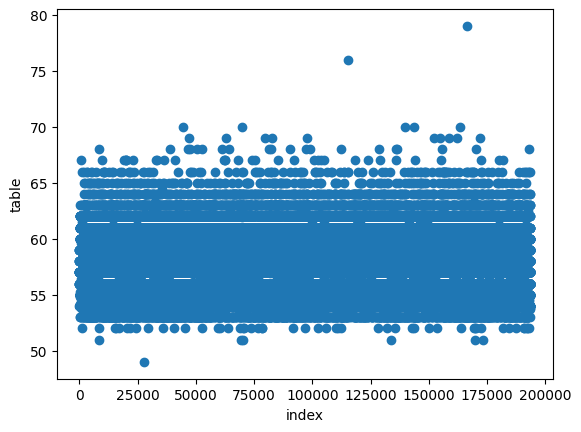

In [31]:
plt.scatter(train.index, train.table)
plt.xlabel("index")
plt.ylabel("table")
plt.show()

Box plot:

Text(0.5, 0, 'table')

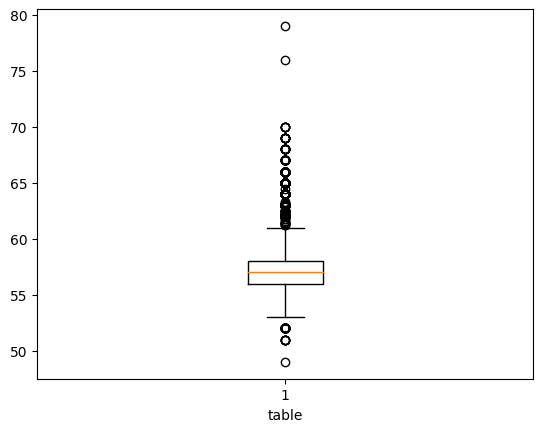

In [32]:
plt.boxplot(train.table)
plt.xlabel("table")

Density plot:

(49.0, 79.0)

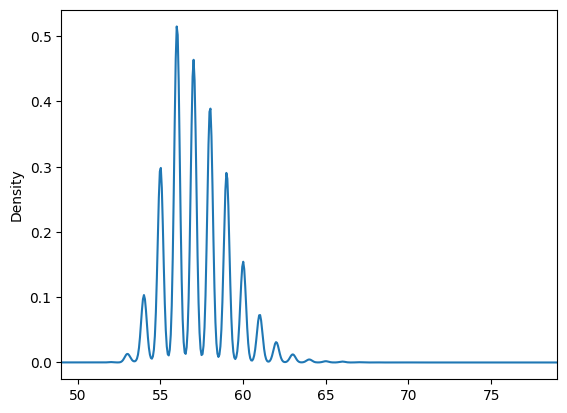

In [33]:
train.table.plot(kind='density')
plt.xlim(49, 79)

Outlier inspection:

In [34]:
train[((train.table>70) | (train.table<53))]

,carat,cut,color,clarity,depth,table,x,y,z,price
1258,0.95,Fair,H,SI1,66.2,52.0,6.07,6.02,4.02,2935
8445,1.20,Good,G,VS2,63.8,52.0,6.73,6.65,4.28,6438
8565,0.90,Premium,H,SI1,61.8,51.0,6.19,6.24,3.84,3545
15118,0.39,Very Good,G,VVS2,61.7,52.0,4.71,4.73,2.91,1049
15896,0.72,Very Good,F,SI1,62.7,52.0,5.69,5.72,3.58,2278
17042,2.02,Very Good,J,VS2,59.7,52.0,8.16,8.20,4.88,12968
20307,0.90,Good,J,VS1,63.1,52.0,6.22,6.13,3.90,3651
21753,2.00,Fair,I,SI1,66.3,52.0,7.80,7.76,5.20,12401
24355,0.39,Very Good,H,SI2,63.6,52.0,4.58,4.62,2.93,454
27886,1.01,Good,F,VS1,63.6,49.0,6.37,6.32,4.04,6976


It seems that table column has some extreme values and are isolated. So we can remove them as there are not a lot of them. The column does not seem to follow a gaussian distribution, but it would be advisable to scale it to a gaussian distribution.

### x
It is an independent variable, it is numerical continuous data type

Summary statistics:

In [35]:
train.x.describe()

count    193573.000000
mean          5.715312
std           1.109422
min           0.000000
25%           4.700000
50%           5.700000
75%           6.510000
max           9.650000
Name: x, dtype: float64

In [36]:
print("mode:", train.x.mode())

mode: 0    4.32
Name: x, dtype: float64


In [37]:
print("Range:", max(train.x)-min(train.x))
q75, q25 = np.percentile(train['x'], [75 ,25])
print("IQR:", q75-q25)

Range: 9.65
IQR: 1.8099999999999996


Scatter plot:

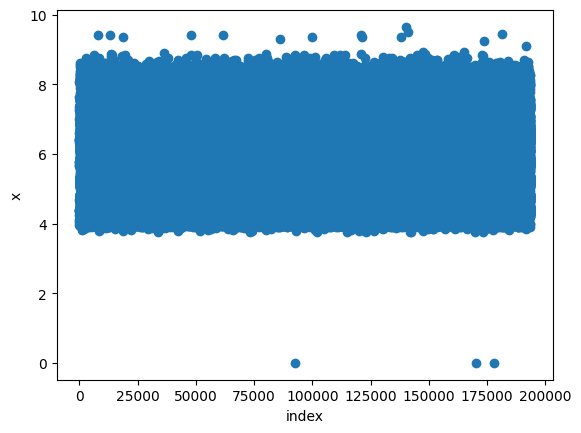

In [38]:
plt.scatter(train.index, train.x)
plt.xlabel("index")
plt.ylabel("x")
plt.show()

Box plot:

Text(0.5, 0, 'x')

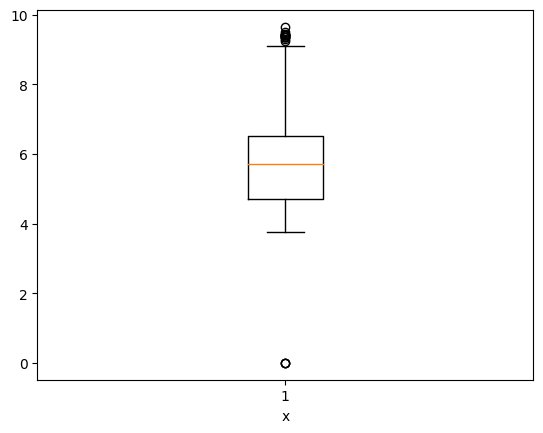

In [39]:
plt.boxplot(train.x)
plt.xlabel("x")

Density plot:

(0.0, 10.0)

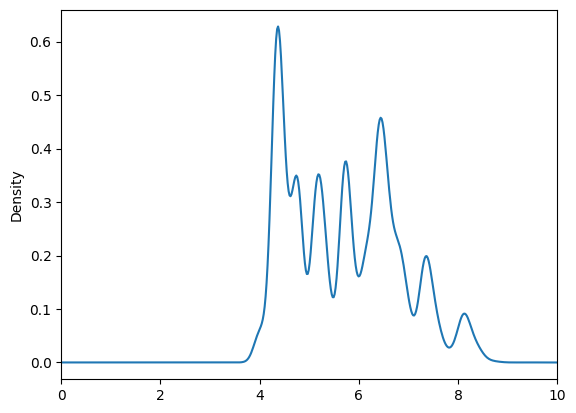

In [40]:
train.x.plot(kind='density')
plt.xlim(0, 10)

Outlier inspection:

In [41]:
train[((train.x>9) | (train.x<2))]

,carat,cut,color,clarity,depth,table,x,y,z,price
8089,3.01,Premium,I,SI2,60.5,60.0,9.43,9.34,5.62,14038
13079,3.00,Ideal,I,SI2,62.1,55.0,9.42,9.24,5.69,17712
18817,3.04,Very Good,J,SI2,63.1,56.0,9.36,9.31,5.75,15354
47783,3.00,Premium,I,I1,61.7,56.0,9.42,10.01,5.67,11370
61506,3.00,Good,D,I1,60.3,60.0,9.42,9.26,5.60,18407
85894,3.00,Premium,I,SI2,60.7,59.0,9.30,9.14,5.60,16970
92703,0.71,Good,F,SI1,64.1,60.0,0.00,0.00,0.00,2130
99800,3.01,Good,F,SI2,60.8,60.0,9.36,9.24,5.00,18640
120952,3.00,Premium,D,SI2,59.5,61.0,9.42,9.26,5.60,17674
121465,3.01,Premium,J,SI2,60.3,59.0,9.36,9.30,5.64,14044


It seems that x column has some extreme values and are isolated. So we can remove them as there are not a lot of them. The column does not seem to follow a gaussian distribution, but it would be advisable to scale it to a gaussian distribution.

### y
It is an independent variable, it is numerical continuous data type

Summary statistics:

In [42]:
train.y.describe()

count    193573.000000
mean          5.720094
std           1.102333
min           0.000000
25%           4.710000
50%           5.720000
75%           6.510000
max          10.010000
Name: y, dtype: float64

In [43]:
print("mode:", train.y.mode())

mode: 0    4.38
Name: y, dtype: float64


In [44]:
print("Range:", max(train.y)-min(train.y))
q75, q25 = np.percentile(train['y'], [75 ,25])
print("IQR:", q75-q25)

Range: 10.01
IQR: 1.7999999999999998


Scatter plot:

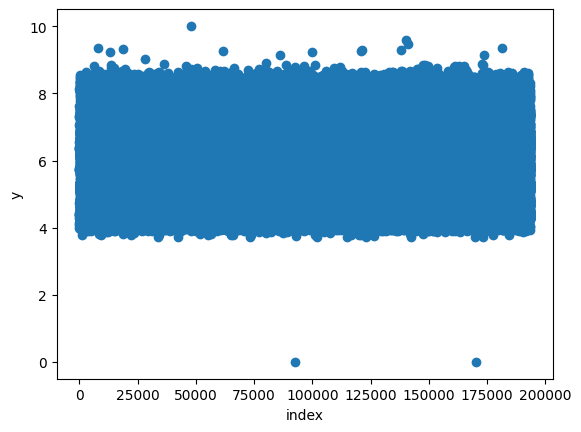

In [45]:
plt.scatter(train.index, train.y)
plt.xlabel("index")
plt.ylabel("y")
plt.show()

Box plot:

Text(0.5, 0, 'y')

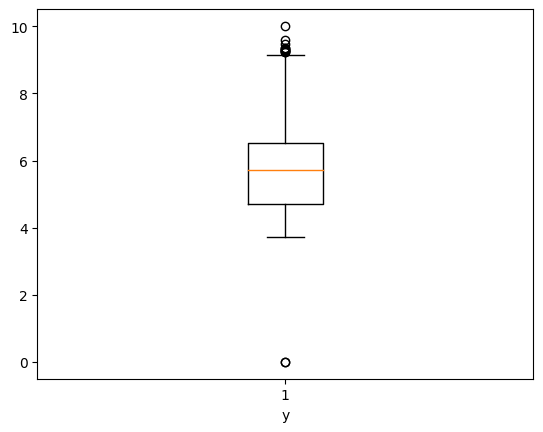

In [46]:
plt.boxplot(train.y)
plt.xlabel("y")

Density plot:

(0.0, 11.0)

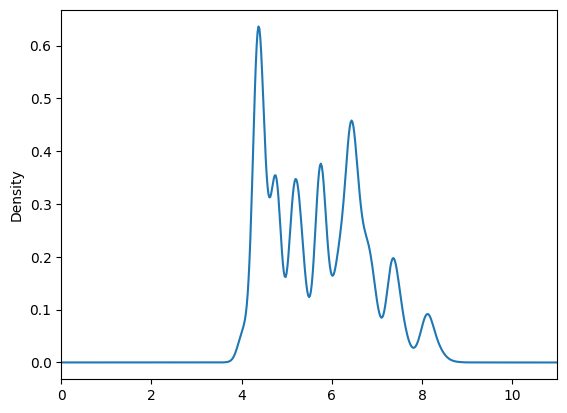

In [47]:
train.y.plot(kind='density')
plt.xlim(0, 11)

Outlier inspection:

In [48]:
train[((train.y>9) | (train.y<2))]

,carat,cut,color,clarity,depth,table,x,y,z,price
8089,3.01,Premium,I,SI2,60.5,60.0,9.43,9.34,5.62,14038
13079,3.00,Ideal,I,SI2,62.1,55.0,9.42,9.24,5.69,17712
18817,3.04,Very Good,J,SI2,63.1,56.0,9.36,9.31,5.75,15354
28219,2.01,Premium,H,I1,62.9,61.0,8.08,9.02,5.05,15308
47783,3.00,Premium,I,I1,61.7,56.0,9.42,10.01,5.67,11370
61506,3.00,Good,D,I1,60.3,60.0,9.42,9.26,5.60,18407
85894,3.00,Premium,I,SI2,60.7,59.0,9.30,9.14,5.60,16970
92703,0.71,Good,F,SI1,64.1,60.0,0.00,0.00,0.00,2130
99800,3.01,Good,F,SI2,60.8,60.0,9.36,9.24,5.00,18640
120952,3.00,Premium,D,SI2,59.5,61.0,9.42,9.26,5.60,17674


It seems that y column has some extreme values and are isolated. So we can remove them as there are not a lot of them. The column does not seem to follow a gaussian distribution, but it would be advisable to scale it to a gaussian distribution.

### z
It is an independent variable, it is numerical continuous data type

Summary statistics:

In [49]:
train.z.describe()

count    193573.000000
mean          3.534246
std           0.688922
min           0.000000
25%           2.900000
50%           3.530000
75%           4.030000
max          31.300000
Name: z, dtype: float64

In [50]:
print("mode:", train.z.mode())

mode: 0    2.69
Name: z, dtype: float64


In [51]:
print("Range:", max(train.z)-min(train.z))
q75, q25 = np.percentile(train['z'], [75 ,25])
print("IQR:", q75-q25)

Range: 31.3
IQR: 1.1300000000000003


Scatter plot:

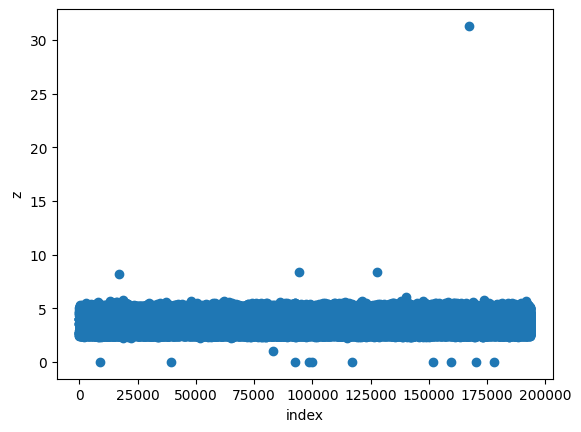

In [52]:
plt.scatter(train.index, train.z)
plt.xlabel("index")
plt.ylabel("z")
plt.show()

Box plot:

Text(0.5, 0, 'z')

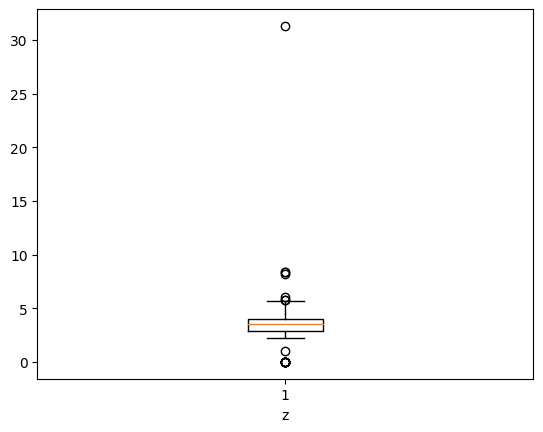

In [53]:
plt.boxplot(train.z)
plt.xlabel("z")

Density plot:

(0.0, 32.0)

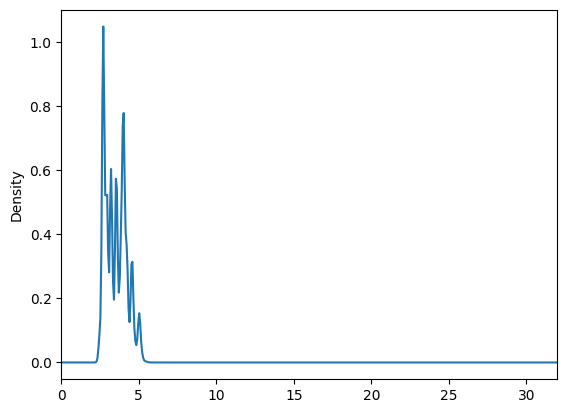

In [54]:
train.z.plot(kind='density')
plt.xlim(0, 32)

Outlier inspection:

In [55]:
train[((train.z>6) | (train.y<3))]

,carat,cut,color,clarity,depth,table,x,y,z,price
17041,2.01,Premium,I,VS1,59.1,60.0,8.28,8.21,8.18,17640
92703,0.71,Good,F,SI1,64.1,60.0,0.00,0.00,0.00,2130
94237,2.10,Premium,H,I1,61.1,57.0,8.42,8.28,8.35,12512
127668,2.22,Ideal,G,VS2,61.8,57.0,8.36,8.32,8.40,18736
140193,3.50,Very Good,H,SI2,62.8,57.0,9.65,9.59,6.03,18507
167044,0.51,Premium,G,VS2,61.8,58.0,5.20,5.13,31.30,1447
170318,0.71,Good,D,VS2,64.1,60.0,0.00,0.00,0.00,910


It seems that z column has some extreme values and are isolated. So we can remove them as there are not a lot of them. The column does not seem to follow a gaussian distribution, but it would be advisable to scale it to a gaussian distribution.

## Bivariate Analysis
Performing bivariate analysis to understand how each variable are related to each other within the train data sample.

### Relationship between independent numerical continuous to target variable 

<Axes: xlabel='z', ylabel='price'>

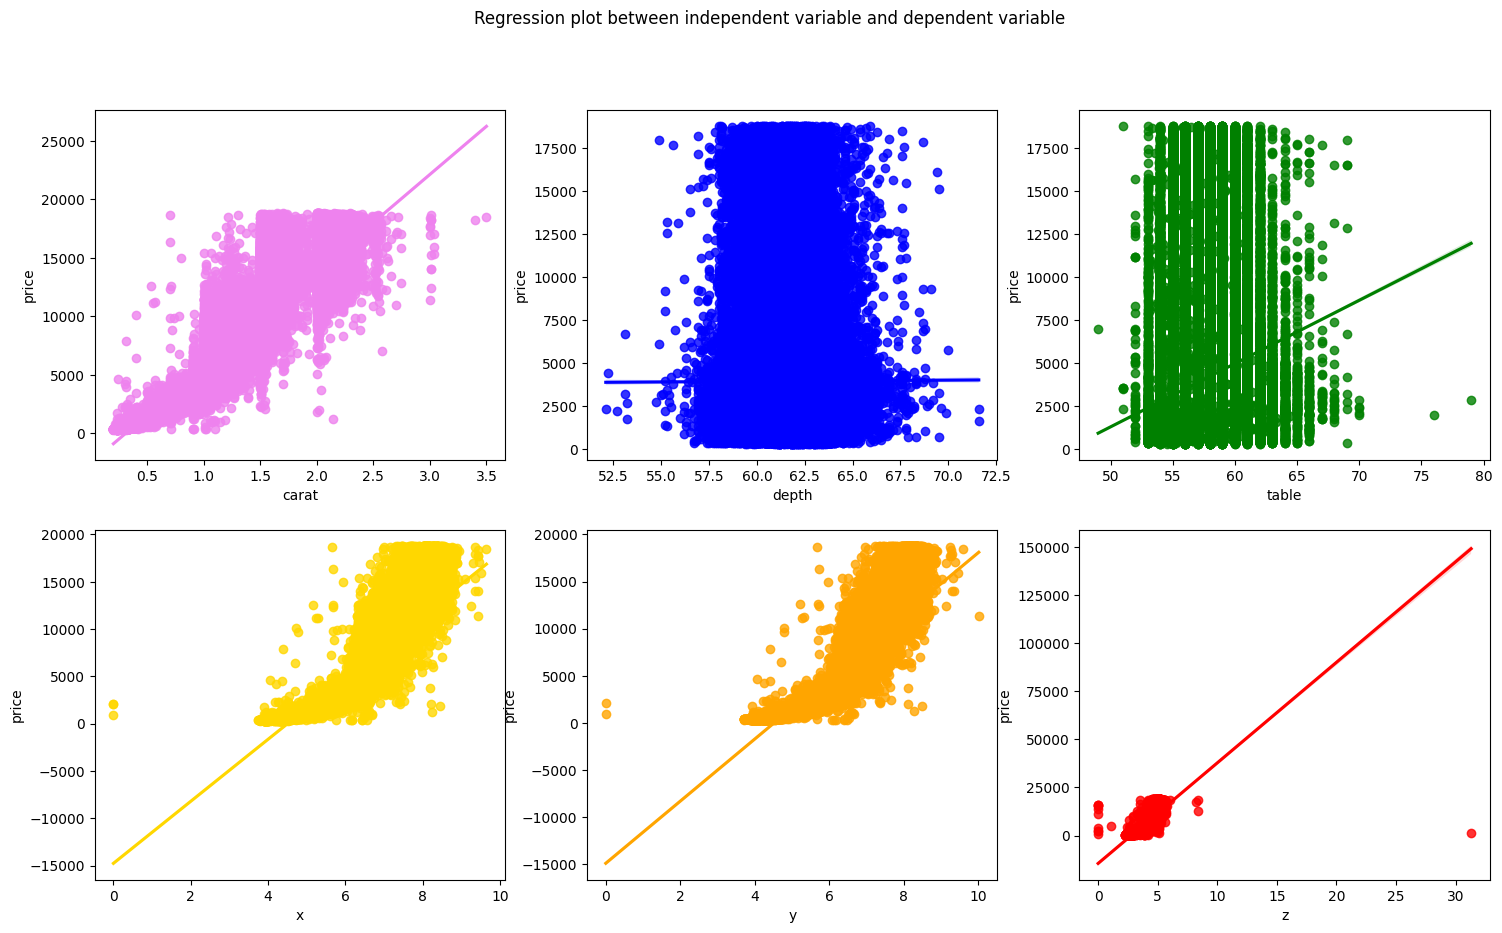

In [56]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Regression plot between independent variable and dependent variable')

sns.regplot(ax=axes[0, 0], data=train, x='carat', y='price', color='violet')
sns.regplot(ax=axes[0, 1], data=train, x='depth', y='price', color='blue')
sns.regplot(ax=axes[0, 2], data=train, x='table', y='price', color='green')
sns.regplot(ax=axes[1, 0], data=train, x='x', y='price', color='gold')
sns.regplot(ax=axes[1, 1], data=train, x='y', y='price', color='orange')
sns.regplot(ax=axes[1, 2], data=train, x='z', y='price', color='red')

From the above regression plot, we can see that there is a strong positive linear relationship between 'carat', 'x'. 'y', and 'z' with 'price' variable. Where as 'depth' and 'table' do not seem to have any linear relationship with 'price'.

### Relationship between independent categorical variable to target variable 

<Axes: xlabel='clarity', ylabel='price'>

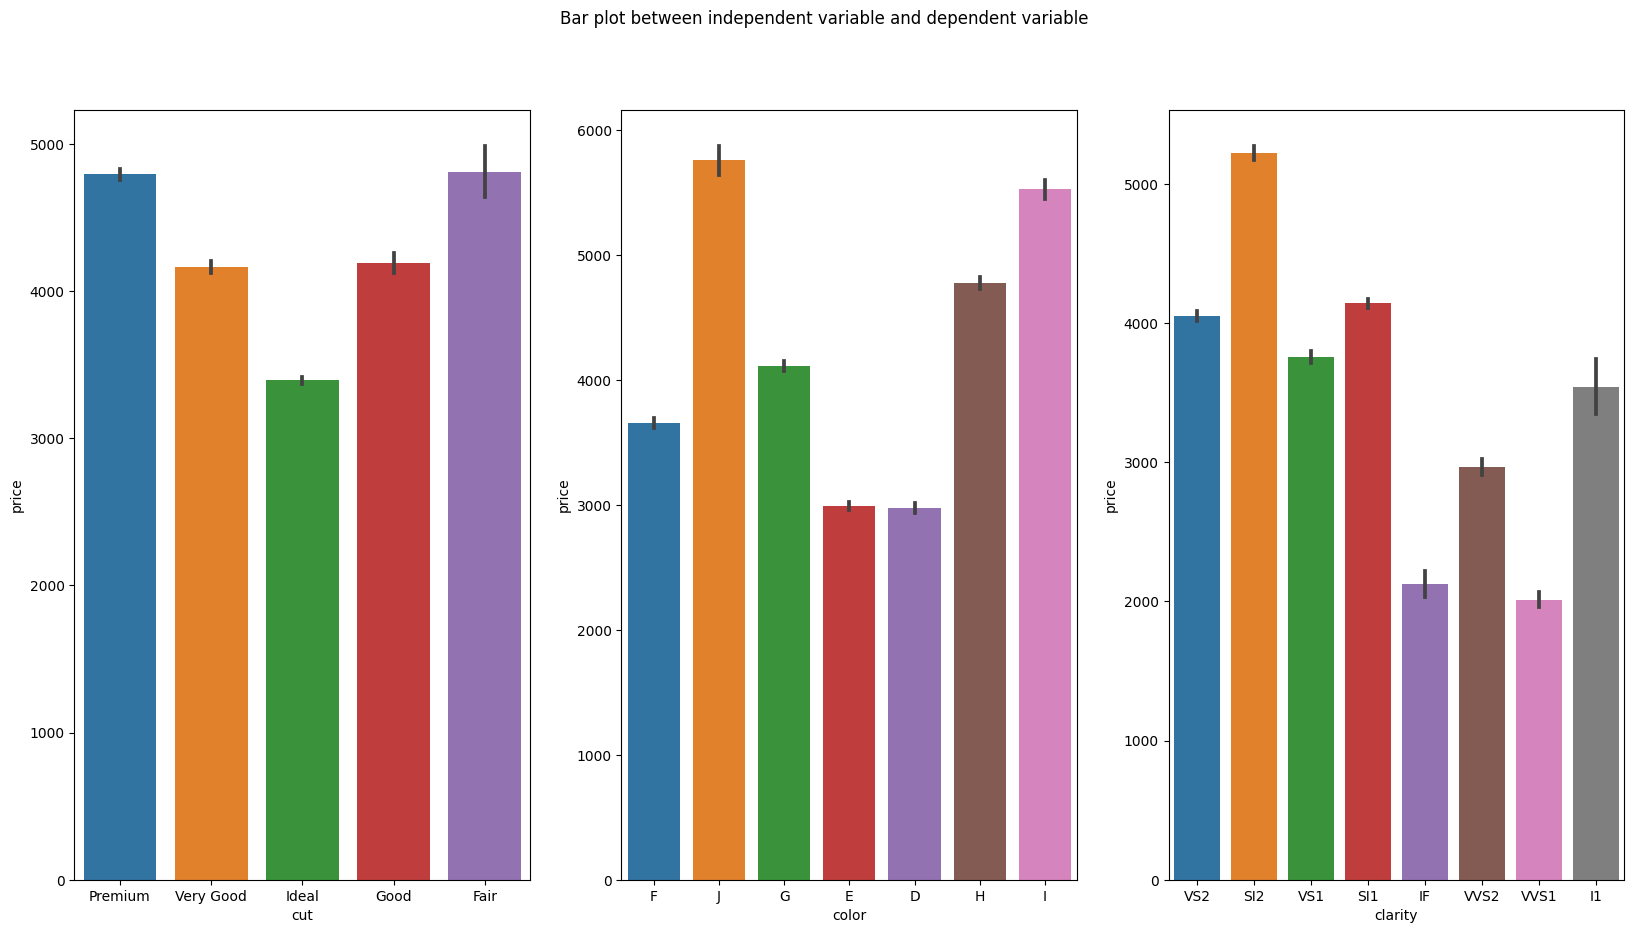

In [57]:
var = ["cut", "color", "clarity"]

fig, axes = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('Bar plot between independent variable and dependent variable')

sns.barplot(ax=axes[0], data=train, x='cut', y='price')
sns.barplot(ax=axes[1], data=train, x='color', y='price')
sns.barplot(ax=axes[2], data=train, x='clarity', y='price')

We can compare the univariate distribution of each of the categorical data to the above plot:

cut: 'Fair' only accounts for 1.0% of the train dataset, yet the price associated with this category is very high. This could mean that gemstones categorised as 'Fair' usually sell for a higher price, but the availability of this data is very low and the model could undervalue the price unless we implement methods to mitigate class imbalance.

color: 'J' and 'I' are the two classes that has the least available data in the training set, but it is categorically the most expensive gemstones. This could cause a problem for the same reason as stated above, and would need to implement methods to mitigate class imabalance.

clarity: Nothing interest is found.

### Correlation between variables

C:\Users\nithi\AppData\Local\Temp\ipykernel_15828\2706272829.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


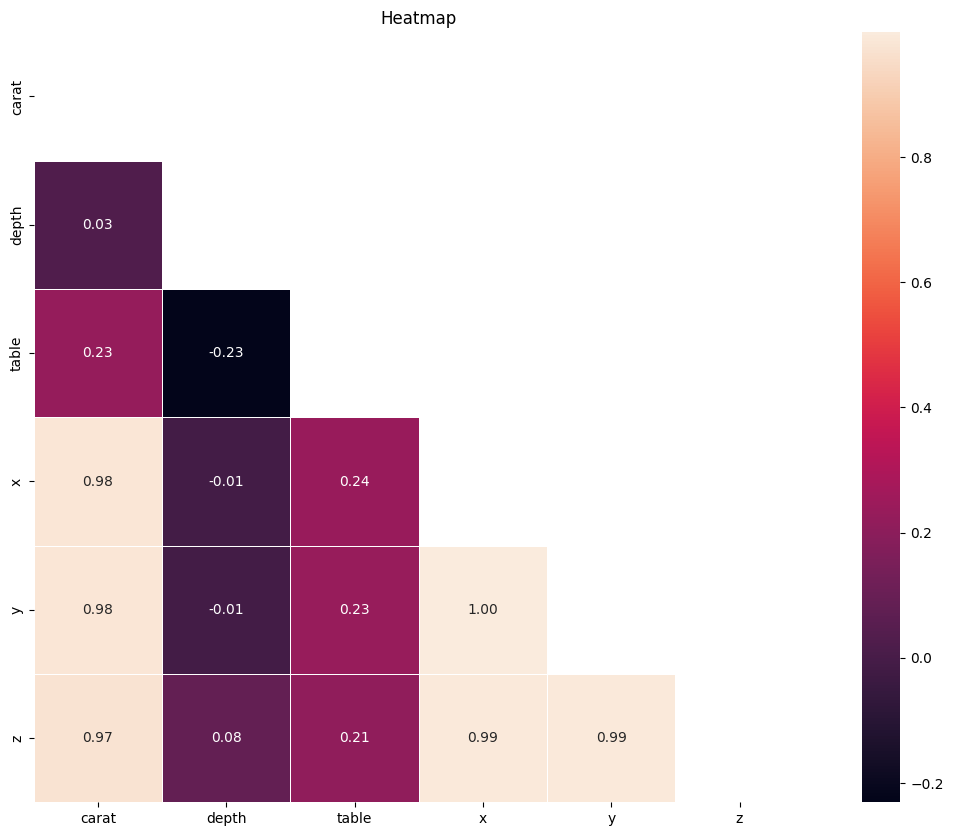

None

In [58]:
def show_corr_heatmap(df, title):
    
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize = (15, 10))
    plt.title(title)
    sns.heatmap(corr, annot = True, linewidths=.5, fmt=".2f", square=True, mask = mask)
    plt.show()
    
display(show_corr_heatmap(train[train.columns[:-1]], "Heatmap"))

'carat': is strongly positively correlated with 'x', 'y', and 'z'

'depth': has no strong corrrelation with any other independent variable

'table': has no strong corrrelation with any other independent variable

'x': has perfect positive correlation to 'y' and 'z'

'y': has perfect positive correlation to 'z'

## Multivariate Analysis
Performing multivariate analysis to understand how the independent variables interact with the dependent variable

### Regression Analysis

In [59]:
# Performing encoding on categorical data
train_copy = train.copy()
train_copy["cut_encoding"] = OrdinalEncoder().fit_transform(np.array(train.cut).reshape(-1, 1))
train_copy["clarity_encoding"] = OrdinalEncoder().fit_transform(np.array(train.clarity).reshape(-1, 1))
train_copy = pd.get_dummies(train, columns=["color"])

In [60]:
X = train_copy.loc[:, ~train_copy.columns.isin(["cut", "clarity", "price"])]
y = train_copy.loc[:, train_copy.columns=="price"]

In [61]:
regr = LinearRegression()
regr.fit(X, y)

LinearRegression()

In [62]:
y_pred = regr.predict(X)
print("R2 score: ", r2_score(y, y_pred))

R2 score:  0.9208786536958673


The independent variables are able to predict 92% of the dependent variable's variation. This is great as it hints that we have a linear relationship between independent and dependent variable.

### Factor Analysis

In [63]:
# Performing encoding on categorical data
train_copy = train.copy()
train_copy["cut_encoding"] = OrdinalEncoder().fit_transform(np.array(train.cut).reshape(-1, 1))
train_copy["clarity_encoding"] = OrdinalEncoder().fit_transform(np.array(train.clarity).reshape(-1, 1))

In [64]:
X = train_copy.loc[:, ~train_copy.columns.isin(["cut", "clarity", "price", "color"])]

In [65]:
fa = FactorAnalysis()
fa.fit(X)

FactorAnalysis()

In [66]:
for feature, noise in zip(fa.feature_names_in_, fa.noise_variance_):
    print(feature, "noise variance:", noise)

carat noise variance: 0.07379078708867201
depth noise variance: 0.9944234543330615
table noise variance: 0.9922962309981984
x noise variance: 0.3950131054885986
y noise variance: 0.3910513878082438
z noise variance: 0.156277890180538
cut_encoding noise variance: 0.7243664581181217
clarity_encoding noise variance: 0.9999690713974121


In [74]:
loadings = fa.components_.T
total_var = X.var(axis=0).sum()
var_exp = np.sum(loadings**2, axis=0)
prop_var_exp = var_exp/total_var

print(f"variance explained: {var_exp.round(2)}")
print(f"proportion of variance explained: {prop_var_exp.round(3)}")

variance explained: [3.4  2.56 1.47 0.09 0.   0.   0.   0.  ]
proportion of variance explained: [0.426 0.32  0.185 0.011 0.    0.    0.    0.   ]


From the factor analysis we can see that only four variables are required to explain the variance in the dataset. Variables that have a high noise variance are best to be ignored as this can cause overfitting.

## Feature Selection
Performing feature selection is important as this improves the speed and reliability of the model

### Variance Analysis

In [67]:
X = train.loc[:, ~train.columns.isin(["cut", "color", "clarity", "price"])]
var = VarianceThreshold()
var.fit(X)

VarianceThreshold()

In [68]:
for feature, variance in zip(var.feature_names_in_, var.variances_):
    print(feature, "variance=", variance)

carat variance= 0.21407883802087066
depth variance= 1.170078272222538
table variance= 3.681944347427288
x variance= 1.2308111641045394
y variance= 1.2151328314156553
z variance= 0.47461121680045154


None of the variables have 0 variance, therefore it is good to keep all the features

### Univariate Feature Selection

In [108]:
X = train.loc[:, ~train.columns.isin(["cut", "color", "clarity", "price"])]
y = train_copy.loc[:, train_copy.columns=="price"]

In [110]:
selector = SelectPercentile(f_regression, percentile=25)
X_reduced = selector.fit(X, y)

C:\Project\playground-series-s3e8\venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [111]:
cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns

['carat', 'y']

Performing univariate test f_regression, features 'carat' and 'y' are in the top 25% percentile on the scale of feature importance, therefore these two features have to be included.

In [133]:
train_copy = train.copy()
train_copy["cut_encoding"] = OrdinalEncoder().fit_transform(np.array(train.cut).reshape(-1, 1))
train_copy["clarity_encoding"] = OrdinalEncoder().fit_transform(np.array(train.clarity).reshape(-1, 1))

X = train_copy.loc[:, train_copy.columns.isin(["cut_encoding", "clarity_encoding"])]

In [134]:
selector = SelectKBest(chi2, k=2)
selector.fit(X, y)

SelectKBest(k=2, score_func=<function chi2 at 0x00000253DF4BBCE0>)

In [135]:
for feat, pval in zip(selector.feature_names_in_, selector.pvalues_):
    print(feat, "p-value:", pval)

cut_encoding p-value: 1.0
clarity_encoding p-value: 0.0


Performing univariate test chi2, p-value of feature 'clarity_encoding' is less than 0.05 and hence it is statistically significant that the feature has a significant relation to the target variable.